# Imports

In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import skimage.io
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from analysis_utils import show_seg, extract_fl_loc
from plotstyle import save_fig, defaultStyle
from scipy.ndimage import center_of_mass
from matplotlib.gridspec import GridSpec
from matplotlib_scalebar.scalebar import ScaleBar
from skimage.measure import regionprops, label

%matplotlib inline

# Fitting IFN-GFP dose response curve with Hill Function
$$y = \dfrac{x^n}{K^n+x^n}$$
$$\dfrac{1}{y} - 1 = \dfrac{K^n}{x^n}$$
$$\ln\left(\dfrac{1}{y} - 1\right) = n\ln K - n\ln x$$

n = 0.70	K = 2.71
Saving figure IFN_GFP_Hill_fitting


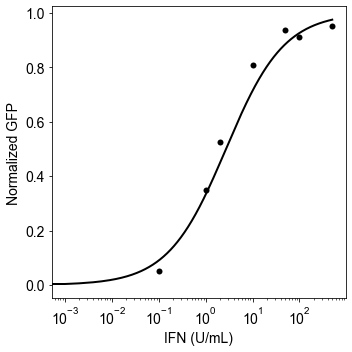

In [7]:
DATA_DIR = os.path.join("../data/")
data_xls = os.path.join(DATA_DIR, "Experimental_Data_1.xlsx")
data = pd.read_excel(data_xls, sheet_name="IFN_GFP_dose_curve", engine="openpyxl")
scaler = MinMaxScaler((0.05, 0.95))
data["GFP"] = scaler.fit_transform(np.nanmean(np.array(data[["GFP_1", "GFP_2", "GFP_3"]]), axis=1, keepdims=True))
data.drop(data[data.IFN==0].index, inplace=True)
p = np.polyfit(np.log(data.IFN), np.log(1/data.GFP - 1), deg=1)
n = - p[0]
K = np.exp(p[1] / n)
print("n = %.2f\tK = %.2f"%(n, K))

defaultStyle()
_, ax = plt.subplots(1, 1, figsize=(5, 5))
ax.scatter(x="IFN", y="GFP", data=data, color="k", linewidth=0)
xdata = np.arange(0, 500, 0.001)
ax.plot(xdata, xdata**n/(K**n+xdata**n), lw=2, color="k")
ax.set_xscale("log")
ax.set_xlabel("IFN (U/mL)")
ax.set_ylabel("Normalized GFP")
np.save("../data/IFN_GFP_Hill.npy", {"n": n, "K": K})
save_fig("IFN_GFP_Hill_fitting")

# Radial diffusion

## Location of sender

In [3]:
ifn_radial_path = "../data/ifn_radial"
img_idx = [0, 1, 2, 4, 5]
imfiles = [os.path.join(ifn_radial_path, "pos%d.tif")%i for i in img_idx]
ims = [skimage.io.imread(f) for f in imfiles]
green_seg_files = [os.path.join(ifn_radial_path, "pos%d.npy"%i) for i in img_idx]

red_ims = [im[:, :, 2] for im in ims]
red_centroid_group = np.zeros((len(img_idx), 2))

for i in [0, 2, 3, 4]:
    normalized_red_im = (red_ims[i] - red_ims[i].min()) / (red_ims[i].max() - red_ims[i].min())
    thresh = normalized_red_im.flatten()[np.argsort(normalized_red_im.flatten())[-100]]
    threshold_im = normalized_red_im > thresh
    com = center_of_mass(threshold_im)
    red_centroid_group[i, 0] = com[0]
    red_centroid_group[i, 1] = com[1]
    
normalized_red_im = (red_ims[1] - red_ims[1].min()) / (red_ims[1].max() - red_ims[1].min())
thresh = normalized_red_im.flatten()[np.argsort(normalized_red_im.flatten())[-500]]
threshold_im = label(normalized_red_im > thresh) == 3
com = center_of_mass(threshold_im)
red_centroid_group[1, 0] = com[0]
red_centroid_group[1, 1] = com[1]
red_centroid_group

OME series: failed to read '2021.4.17_20ng-ml dox_ IFN diffusion_single cell_2x2bin_1_MMStack_Pos1.ome.tif'
OME series: failed to read '2021.4.17_20ng-ml dox_ IFN diffusion_single cell_2x2bin_1_MMStack_Pos1.ome.tif'
OME series: failed to read '2021.4.17_20ng-ml dox_ IFN diffusion_single cell_2x2bin_1_MMStack_Pos1.ome.tif'
OME series: failed to read '2021.4.17_20ng-ml dox_ IFN diffusion_single cell_2x2bin_1_MMStack_Pos2.ome.tif'
OME series: failed to read '2021.4.17_20ng-ml dox_ IFN diffusion_single cell_2x2bin_1_MMStack_Pos2.ome.tif'
OME series: failed to read '2021.4.17_20ng-ml dox_ IFN diffusion_single cell_2x2bin_1_MMStack_Pos2.ome.tif'
OME series: failed to read '2021.4.17_20ng-ml dox_ IFN diffusion_single cell_2x2bin_1_MMStack_Pos3.ome.tif'
OME series: failed to read '2021.4.17_20ng-ml dox_ IFN diffusion_single cell_2x2bin_1_MMStack_Pos3.ome.tif'
OME series: failed to read '2021.4.17_20ng-ml dox_ IFN diffusion_single cell_2x2bin_1_MMStack_Pos3.ome.tif'
OME series: failed to read '

array([[472.14141414, 523.        ],
       [445.125     , 514.125     ],
       [463.43434343, 492.53535354],
       [447.93939394, 545.07070707],
       [542.04040404, 504.15151515]])

## Extract fluorescence and location data

OME series: failed to read '2021.4.17_20ng-ml dox_ IFN diffusion_single cell_2x2bin_1_MMStack_Pos1.ome.tif'
OME series: failed to read '2021.4.17_20ng-ml dox_ IFN diffusion_single cell_2x2bin_1_MMStack_Pos1.ome.tif'
OME series: failed to read '2021.4.17_20ng-ml dox_ IFN diffusion_single cell_2x2bin_1_MMStack_Pos1.ome.tif'
OME series: failed to read '2021.4.17_20ng-ml dox_ IFN diffusion_single cell_2x2bin_1_MMStack_Pos2.ome.tif'
OME series: failed to read '2021.4.17_20ng-ml dox_ IFN diffusion_single cell_2x2bin_1_MMStack_Pos2.ome.tif'
OME series: failed to read '2021.4.17_20ng-ml dox_ IFN diffusion_single cell_2x2bin_1_MMStack_Pos2.ome.tif'
OME series: failed to read '2021.4.17_20ng-ml dox_ IFN diffusion_single cell_2x2bin_1_MMStack_Pos3.ome.tif'
OME series: failed to read '2021.4.17_20ng-ml dox_ IFN diffusion_single cell_2x2bin_1_MMStack_Pos3.ome.tif'
OME series: failed to read '2021.4.17_20ng-ml dox_ IFN diffusion_single cell_2x2bin_1_MMStack_Pos3.ome.tif'
OME series: failed to read '

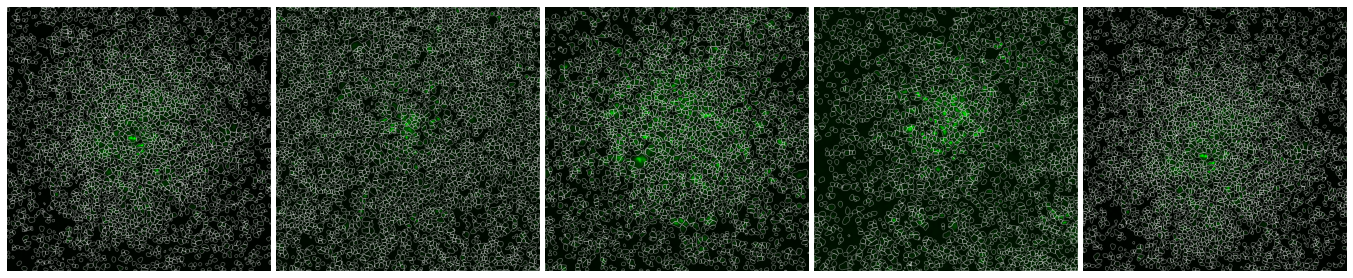

In [4]:
_, ax = plt.subplots(1, 5, figsize=(24, 5))
plt.subplots_adjust(wspace=0.02)
props_group = []
for i in range(len(img_idx)):
    show_seg(green_seg_files[i], imfiles[i], ax=ax[i], chan=1, adjust=1)
    props = extract_fl_loc(green_seg_files[i], imfiles[i], chan=1)
    props_group.append(np.array([[p.mean_intensity, np.sqrt(((np.array(p.centroid) - red_centroid_group[i]) ** 2).sum())] for p in props]))

## Determine the range of fluorescence

In [5]:
percent = 50
all_fluorescences = np.concatenate([props_group[idx][:, 0] for idx in range(len(props_group))])
min_fl = all_fluorescences[np.argsort(all_fluorescences)[percent//50]]
max_fl = all_fluorescences[np.argsort(all_fluorescences)[-percent//50]]

## Main figure

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Saving figure ifn_radial_main


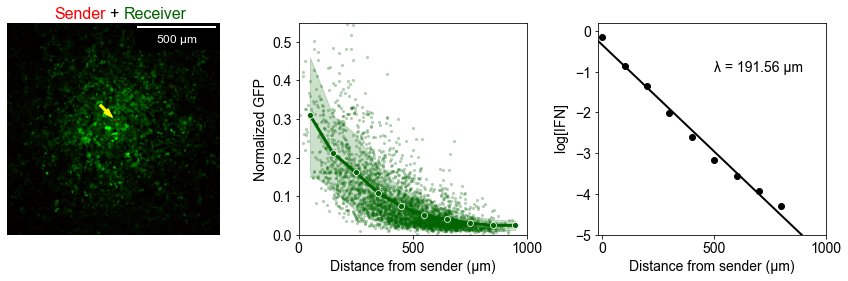

In [12]:
main_fig_index  = [0]
_, ax = plt.subplots(1, 3, figsize=(12, 4))
plt.subplots_adjust(wspace=0.05)
defaultStyle()

for i, idx in enumerate(main_fig_index):
    # ax1 = fig.add_subplot(gs1[i, 0])
    # ax1.imshow(ims[idx][:, :, 0], cmap="gray")
    raw_im = ims[idx]
    rgb_im = np.zeros_like(raw_im, dtype=float)
    rgb_im[:, :, 0] = (raw_im[:, :, 2] - np.min(raw_im[:, :, 2])) / (np.max(raw_im[:, :, 2]) - np.min(raw_im[:, :, 2]))
    rgb_im[:, :, 1] = (raw_im[:, :, 1] - min_fl) / (max_fl - min_fl)
    ax[0].imshow(rgb_im)
    scalebar = ScaleBar(1.3, units="um", color="w", box_color='k', fixed_value=500, font_properties={"size": 12, "family": "Arial"})
    ax[0].add_artist(scalebar)
    arrowlen = 75
    ax[0].arrow(red_centroid_group[idx, 1] - arrowlen, red_centroid_group[idx, 0] - arrowlen, arrowlen * 0.8, arrowlen * 0.8, width=10, color="yellow", length_includes_head=True)
    ax[0].axis("off")    
    ax[0].text(350, -5, "Sender", ha="center", va="bottom", size=16, color="red")
    ax[0].text(512, -5, "+", ha="center", va="bottom", size=16, color="black")
    ax[0].text(712, -5, "Receiver", ha="center", va="bottom", size=16, color="darkgreen")
    
    distances = props_group[idx][:, 1] * 1.3
    fluorescences = props_group[idx][:, 0]
    fluorescences = (fluorescences - min_fl) / (max_fl - min_fl)
    ax[1].scatter(distances, fluorescences, s=10, c="darkgreen", alpha=0.3, linewidth=0)
    
    xinterval = 100
    xbin = np.arange(0, 1000, xinterval)
    binned_distances = np.digitize(distances, xbin)
    gradient_data = np.stack([binned_distances, fluorescences], axis=1)
    gradient_df = pd.DataFrame(gradient_data, columns=["binned_distance", "intensity"])
    gradient_df.binned_distance = gradient_df.binned_distance.apply(lambda x: x * xinterval - xinterval / 2) # + xinterval / 2)
    sns.lineplot(x="binned_distance", y="intensity", data=gradient_df, ax=ax[1], ci='sd', color="darkgreen", lw=3, marker="o")
    ax[1].axis([0, 1000, 0, 0.55])
    ax[1].set_xticks([0, 500, 1000])
    ax[1].set_xlabel("Distance from sender (μm)")
    ax[1].set_ylabel("Normalized GFP")
    
    gfp_gradient = np.array([gradient_df[gradient_df.binned_distance == d].intensity.mean() for d in gradient_df.binned_distance.unique()])
    ifn_gradient = np.exp(- np.log(1/gfp_gradient - 1) / n + np.log(K))
    ax[2].scatter(xbin[-2::-1], np.log(ifn_gradient)[1:], color="k")
    p = np.polyfit(xbin[-2::-1], np.log(ifn_gradient)[1:], deg=1)
    xdata = np.arange(-20, 1000, 1)
    ax[2].plot(xdata, xdata * p[0] + p[1], color="k", lw=2)
    ax[2].set_xlim([-20, 870])
    ax[2].set_xlabel("Distance from sender (μm)")
    ax[2].set_ylabel("$\log\mathrm{[IFN]}$")
    ax[2].set_ylim([-5, 0.2])
    ax[2].set_xticks([0, 500, 1000])
    ax[2].text(500, -1, "λ = %.2f μm"%(-1/p[0]), fontsize=14)
    
save_fig("ifn_radial_main")

## Supp

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Characteristic length: 142.18 μm
Characteristic length: 225.46 μm
Characteristic length: 184.39 μm
Characteristic length: 209.12 μm
Saving figure ifn_radial_supp


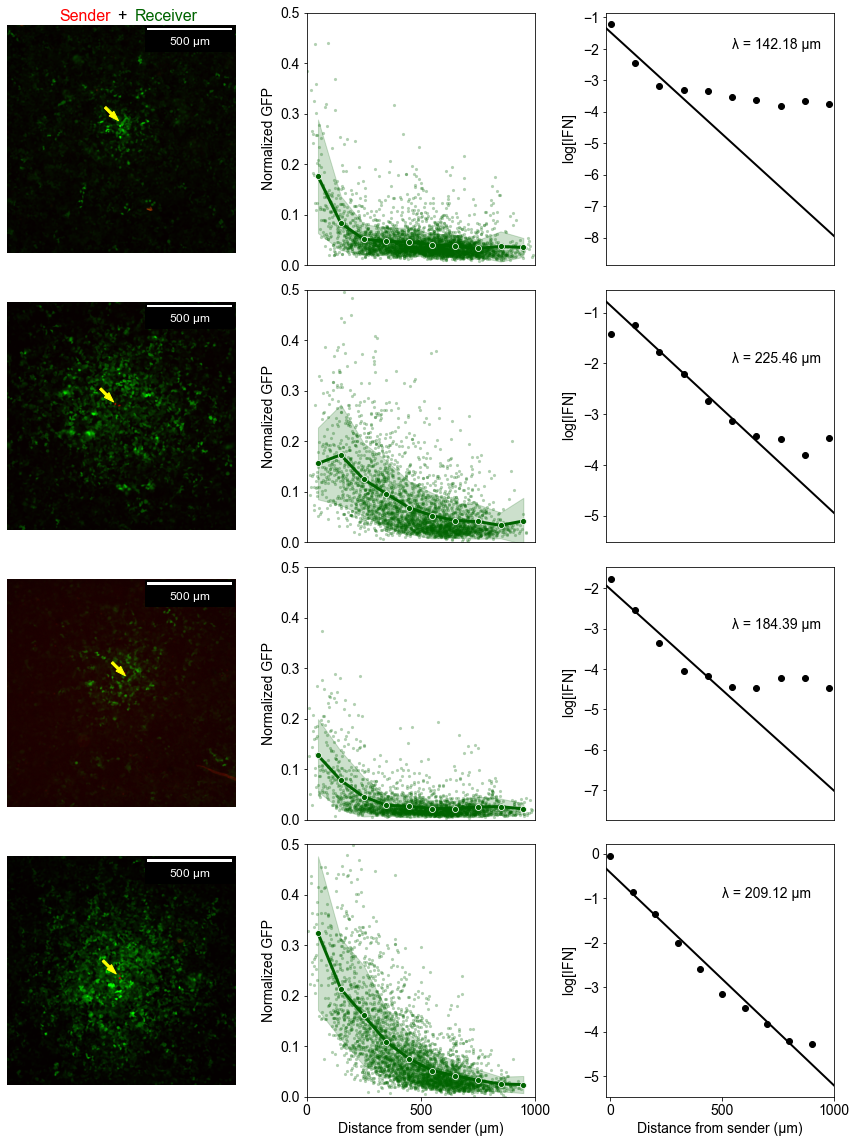

In [7]:
main_fig_index  = [1, 2, 3, 4]
_, ax = plt.subplots(4, 3, figsize=(12, 16))
plt.subplots_adjust(wspace=0.2, hspace=0.02)
defaultStyle()

for i, idx in enumerate(main_fig_index):
    # ax1 = fig.add_subplot(gs1[i, 0])
    # ax1.imshow(ims[idx][:, :, 0], cmap="gray")
    raw_im = ims[idx]
    rgb_im = np.zeros_like(raw_im, dtype=float)
    rgb_im[:, :, 0] = (raw_im[:, :, 2] - np.min(raw_im[:, :, 2])) / (np.max(raw_im[:, :, 2]) - np.min(raw_im[:, :, 2]))
    rgb_im[:, :, 1] = (raw_im[:, :, 1] - min_fl) / (max_fl - min_fl)
    ax[i, 0].imshow(rgb_im)
    scalebar = ScaleBar(1.3, units="um", color="w", box_color='k', fixed_value=500, font_properties={"size": 12, "family": "Arial"})
    ax[i, 0].add_artist(scalebar)
    arrowlen = 75
    ax[i, 0].arrow(red_centroid_group[idx, 1] - arrowlen, red_centroid_group[idx, 0] - arrowlen, arrowlen * 0.8, arrowlen * 0.8, width=10, color="yellow", length_includes_head=True)
    ax[i, 0].axis("off")
    
    distances = props_group[idx][:, 1] * 1.3
    fluorescences = props_group[idx][:, 0]
    fluorescences = fluorescences = (fluorescences - min_fl) / (max_fl - min_fl)
    ax[i, 1].scatter(distances, fluorescences, s=10, c="darkgreen", alpha=0.3, linewidth=0)
    
    xinterval = 100
    xbin = np.arange(0, 1000, xinterval)
    binned_distances = np.digitize(distances, xbin)
    gradient_data = np.stack([binned_distances, fluorescences], axis=1)
    gradient_df = pd.DataFrame(gradient_data, columns=["binned_distance", "intensity"])
    gradient_df.binned_distance = gradient_df.binned_distance.apply(lambda x: x * xinterval - xinterval / 2) # + xinterval / 2)
    sns.lineplot(x="binned_distance", y="intensity", data=gradient_df, ax=ax[i, 1], ci='sd', color="darkgreen", lw=3, marker="o")
    ax[i, 1].axis([0, 1000, 0, 0.5])
    ax[i, 1].set_xticks([])
    ax[i, 1].set_ylabel("Normalized GFP")
    ax[i, 1].set_xlabel("")
    
    gfp_gradient = np.array([gradient_df[gradient_df.binned_distance == d].intensity.mean() for d in xbin + xinterval / 2])
    ifn_gradient = np.exp(- np.log(1/gfp_gradient - 1) / n + np.log(K))
    
    xdata = np.arange(-20, 1000, 1)
    ax[i, 2].scatter(xbin, np.log(ifn_gradient), color="k")
    
    if i == 0:
        p = np.polyfit(xbin[:4], np.log(ifn_gradient)[:4], deg=1)        
        ax[i, 2].text(500, -2, "λ = %.2f μm"%(-1/p[0]), fontsize=14)
    elif i == 1:
        p = np.polyfit(xbin[1:-3], np.log(ifn_gradient)[1:-3], deg=1) 
        ax[i, 2].text(500, -2, "λ = %.2f μm"%(-1/p[0]), fontsize=14)
    elif i == 2:
        p = np.polyfit(xbin[:6], np.log(ifn_gradient)[:6], deg=1)
        ax[i, 2].text(500, -3, "λ = %.2f μm"%(-1/p[0]), fontsize=14)
    elif i == 3:
        p = np.polyfit(xbin, np.log(ifn_gradient), deg=1)
        ax[i, 2].text(500, -1, "λ = %.2f μm"%(-1/p[0]), fontsize=14)
    
    ax[i, 2].plot(xdata, xdata * p[0] + p[1], color="k", lw=2)        
    print("Characteristic length: %.2f μm"%(-1/p[0]))
        
    ax[i, 2].set_xlim([-20, 920])
    # ax[i, 2].set_ylim([-5, 0.5])
    ax[i, 2].set_xlabel("")
    ax[i, 2].set_ylabel("$\log\mathrm{[IFN]}$")
    ax[i, 2].set_xticks([])
    
    if i == 0:
        ax[i, 0].text(350, -5, "Sender", ha="center", va="bottom", size=16, color="red")
        ax[i, 0].text(512, -5, "+", ha="center", va="bottom", size=16, color="black")
        ax[i, 0].text(712, -5, "Receiver", ha="center", va="bottom", size=16, color="darkgreen")
    elif i == 3:
        ax[i, 1].set_xticks([0, 500, 1000])
        ax[i, 1].set_xlabel("Distance from sender (μm)")
        ax[i, 2].set_xticks([0, 500, 1000])
        ax[i, 2].set_xlabel("Distance from sender (μm)")        
save_fig("ifn_radial_supp")

$$D = 100 \mu m^2 / s$$

$$k = 100 / 200^2 = 2.5\times 10^{-3} s^{-1}$$


# Linear diffusion

## Show segmentations

In [13]:
ifn_linear_path = "../data/ifn_linear"
intensities = [100, 500, 1100]
durations = [5, 30, 60]
control = "nolight"

idx = 0
props_arr_group = []
raw_im_group = []
group_names = []
for intensity in intensities:
    for duration in durations:
        im_file = os.path.join(ifn_linear_path, "%d_%d.tif"%(duration, intensity))
        if not os.path.exists(im_file):
            continue
        print(im_file)
        group_names.append(im_file)
        seg_file = os.path.join(ifn_linear_path, "%d_%d_green_seg.npy"%(duration, intensity))
        im = skimage.io.imread(im_file)
        masks = np.load(seg_file, allow_pickle=True).item()["masks"]
        props = regionprops(masks, intensity_image=im[1, :, :])
        raw_im_group.append(im)
        props_arr = np.array([[p.mean_intensity, p.centroid[1]] for p in props])
        props_arr_group.append(props_arr)
        idx += 1
        
im_file = os.path.join(ifn_linear_path, "nolight.tif")
print(im_file)
seg_file = os.path.join(ifn_linear_path, "nolight_green_seg.npy")
im = skimage.io.imread(im_file)
raw_im_group.append(im)
masks = np.load(seg_file, allow_pickle=True).item()["masks"]
props = regionprops(masks, intensity_image=im[1, :, :])
props_arr = np.array([[p.mean_intensity, p.centroid[1]] for p in props])
props_arr_group.append(props_arr)

../data/ifn_linear/30_100.tif
../data/ifn_linear/30_500.tif
../data/ifn_linear/5_1100.tif
../data/ifn_linear/30_1100.tif
../data/ifn_linear/60_1100.tif
../data/ifn_linear/nolight.tif


## Normalize GFP

In [14]:
min_percent = 50
max_percent = 100
all_fluorescences = np.concatenate([props_arr[:, 0] for props_arr in props_arr_group])
min_fl = all_fluorescences[np.argsort(all_fluorescences)[len(all_fluorescences)//min_percent]]
max_fl = all_fluorescences[np.argsort(all_fluorescences)[-len(all_fluorescences)//max_percent]]

## Main

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Saving figure ifn_linear_main


/home/liboyan/Documents/optoSTING/scripts/plotstyle.py:20: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


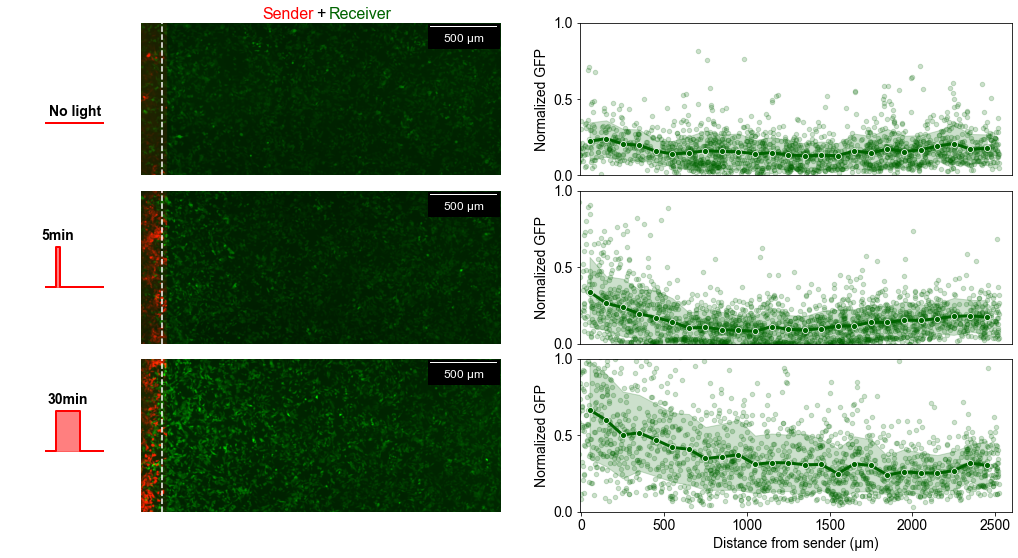

In [18]:
fig = plt.figure(figsize=(18, 9))
gs1 = GridSpec(3, 1, right=0.2, figure=fig, hspace=0.02)
gs2 = GridSpec(3, 2, left=0.2, figure=fig, hspace=0.1, wspace=0.1)
ax = [fig.add_subplot(gs1[i]) for i in range(3)]

ax[0].plot([-0.2, 1], [0, 0], c="r", lw=2)
ax[0].text(0.4, 0.1, "No light", ha="center", va="bottom", fontsize=14, family="Arial", weight="bold")
for i, duration in enumerate([5, 30]):
    ax[i+1].plot([-0.2, 0, 0, duration / 60, duration / 60, 1], [0, 0, 1, 1, 0, 0], c="r", lw=2)
    ax[i+1].fill([0, 0, duration / 60, duration / 60, 0], [0, 1, 1, 0, 0], color="r", alpha=0.5)
    ax[i+1].text(duration / 120, 1.1, "%dmin"%duration, ha="center", va="bottom", fontsize=14, family="Arial", weight="bold")
for a in ax:
    a.set_xlim([-1, 1])
    a.set_ylim([-1.5, 2.5])
    a.axis("off")

ax = np.array([[fig.add_subplot(gs2[i, j]) for j in range(2)] for i in range(3)])
im_indices = [5, 2, 3]
for i, idx in enumerate(im_indices):
    im_rgb = np.zeros((raw_im_group[0].shape[1], raw_im_group[0].shape[2], 3))
    im_rgb[:, :, 0] = (raw_im_group[idx][0, :, :] - raw_im_group[idx][0, :, :].min()) / (raw_im_group[idx][0, :, :].max() - raw_im_group[idx][0, :, :].min()) * 3
    im_rgb[:, 300:, 0] = 0
    im_rgb[:, :, 1] = raw_im_group[idx][1, :, :] / 5e3 # - all_fluorescences.min()) / (all_fluorescences.max() - all_fluorescences.min()) 
    ax[i, 0].imshow(im_rgb)
    ax[i, 0].axis("off")
    scalebar = ScaleBar(0.65, units="um", color="w", box_color='k', fixed_value=500, font_properties={"size": 12, "family": "Arial"})
    ax[i, 0].add_artist(scalebar)
    fluorescences = (props_arr_group[idx][:, 0] - min_fl) / (max_fl - min_fl)
    boundary = 250
    distances = (props_arr_group[idx][:, 1] - boundary) * 0.65
    ax[i, 1].scatter(distances[::3], fluorescences[::3], color="darkgreen", marker="o", s=20, alpha=0.2)
    ax[i, 0].axvline(x=boundary, color="w", linestyle="--")
    
    xinterval = 100
    xbin = np.arange(0, 2500, xinterval)
    binned_distances = np.digitize(distances, xbin)
    gradient_data = np.stack([binned_distances, fluorescences], axis=1)
    gradient_df = pd.DataFrame(gradient_data, columns=["binned_distance", "intensity"])
    gradient_df.binned_distance = gradient_df.binned_distance.apply(lambda x: x * xinterval - xinterval / 2) # + xinterval / 2)
    gradient_df.drop(gradient_df[(gradient_df.binned_distance < 0)].index, inplace=True)
    sns.lineplot(x="binned_distance", y="intensity", data=gradient_df, ax=ax[i, 1], ci='sd', color="darkgreen", lw=3, marker="o")
    ax[i, 1].set_ylim([0, 1])
    ax[i, 1].set_yticks([0, 0.5, 1])
    ax[i, 1].set_ylabel("Normalized GFP")
    ax[i, 1].set_xlabel("")
    ax[i, 1].set_xlim([-10, 2600])
    ax[i, 1].set_xticks([])
    if i == 0:
        ax[i, 0].text(1700, -5, "Sender", ha="center", va="bottom", size=16, color="red")
        ax[i, 0].text(2067, -5, "+", ha="center", va="bottom", size=16, color="black")
        ax[i, 0].text(2520, -5, "Receiver", ha="center", va="bottom", size=16, color="darkgreen")
    
    if i == 2:
        ax[i, 1].set_xlabel("Distance from sender (μm)")
        ax[i, 1].set_xticks([0, 500, 1000, 1500, 2000, 2500])
save_fig("ifn_linear_main")

## Supp

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Saving figure ifn_linear_supp


/home/liboyan/Documents/optoSTING/scripts/plotstyle.py:20: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


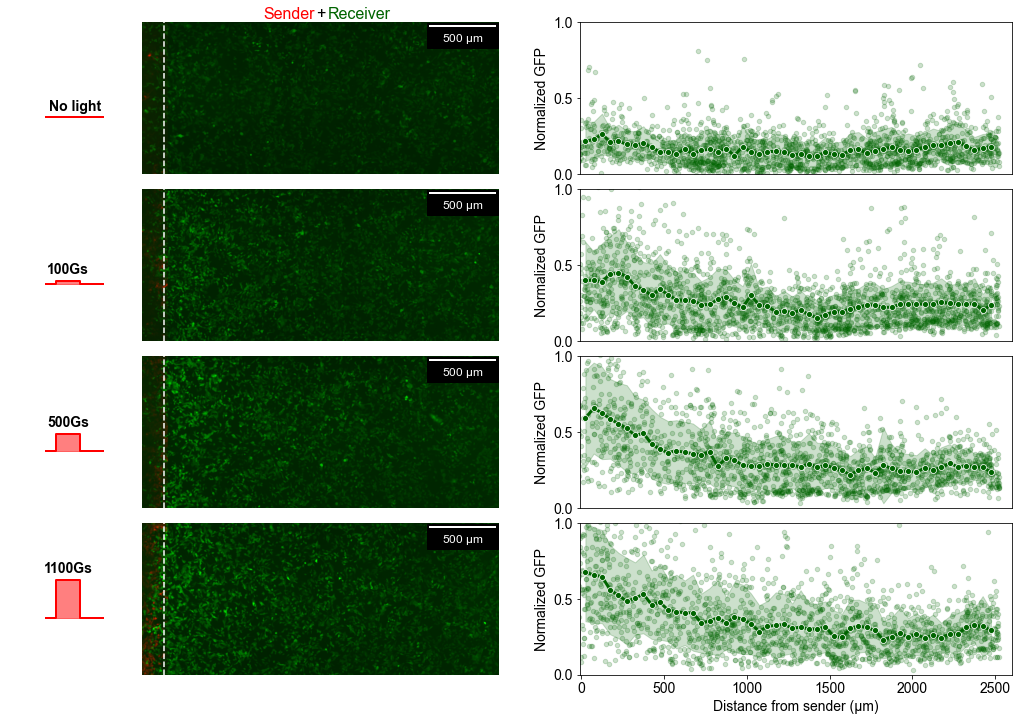

In [17]:
fig = plt.figure(figsize=(18, 12))
gs1 = GridSpec(4, 1, right=0.2, figure=fig, hspace=0.1)
gs2 = GridSpec(4, 2, left=0.2, figure=fig, hspace=0.1, wspace=0.1)
ax = [fig.add_subplot(gs1[i]) for i in range(4)]

ax[0].plot([-0.2, 1], [0, 0], c="r", lw=2)
ax[0].text(0.4, 0.1, "No light", ha="center", va="bottom", fontsize=14, family="Arial", weight="bold")
for i, intensity in enumerate([100, 500, 1100]):
    ax[i+1].plot([-0.2, 0, 0, 0.5, 0.5, 1], [0, 0, intensity / 1100, intensity / 1100, 0, 0], c="r", lw=2)
    ax[i+1].fill([0, 0, 0.5, 0.5, 0], [0, intensity / 1100, intensity / 1100, 0, 0], color="r", alpha=0.5)
    ax[i+1].text(0.25, intensity / 1100 + 0.1, "%dGs"%intensity, ha="center", va="bottom", fontsize=14, family="Arial", weight="bold")
for a in ax:
    a.set_xlim([-1, 1])
    a.set_ylim([-1.5, 2.5])
    a.axis("off")

ax = np.array([[fig.add_subplot(gs2[i, j]) for j in range(2)] for i in range(4)])
im_indices = [5, 0, 1, 3]
for i, idx in enumerate(im_indices):
    im_rgb = np.zeros((raw_im_group[0].shape[1], raw_im_group[0].shape[2], 3))
    im_rgb[:, :, 0] = (raw_im_group[idx][0, :, :] - raw_im_group[idx][0, :, :].min()) / (raw_im_group[idx][0, :, :].max() - raw_im_group[idx][0, :, :].min())
    im_rgb[:, 300:, 0] = 0
    im_rgb[:, :, 1] = raw_im_group[idx][1, :, :] / 5e3 # - all_fluorescences.min()) / (all_fluorescences.max() - all_fluorescences.min()) 
    ax[i, 0].imshow(im_rgb)
    ax[i, 0].axis("off")
    scalebar = ScaleBar(0.65, units="um", color="w", box_color='k', fixed_value=500, font_properties={"size": 12, "family": "Arial"})
    ax[i, 0].add_artist(scalebar)
    fluorescences = (props_arr_group[idx][:, 0] - min_fl) / (max_fl - min_fl)
    boundary = 250
    distances = (props_arr_group[idx][:, 1] - boundary) * 0.65
    ax[i, 1].scatter(distances[::3], fluorescences[::3], color="darkgreen", s=20, alpha=0.2)
    ax[i, 0].axvline(x=boundary, color="w", linestyle="--")
    
    xinterval = 50
    xbin = np.arange(0, 2500, xinterval)
    binned_distances = np.digitize(distances, xbin)
    gradient_data = np.stack([binned_distances, fluorescences], axis=1)
    gradient_df = pd.DataFrame(gradient_data, columns=["binned_distance", "intensity"])
    gradient_df.binned_distance = gradient_df.binned_distance.apply(lambda x: x * xinterval - xinterval / 2) # + xinterval / 2)
    gradient_df.drop(gradient_df[(gradient_df.binned_distance < 0)].index, inplace=True)
    sns.lineplot(x="binned_distance", y="intensity", data=gradient_df, ax=ax[i, 1], ci='sd', color="darkgreen", lw=3, marker="o")
    ax[i, 1].set_ylim([0, 1])
    ax[i, 1].set_yticks([0, 0.5, 1])
    ax[i, 1].set_ylabel("Normalized GFP")
    ax[i, 1].set_xlabel("")
    ax[i, 1].set_xlim([-10, 2600])
    ax[i, 1].set_xticks([])
    if i == 0:
        ax[i, 0].text(1700, -5, "Sender", ha="center", va="bottom", size=16, color="red")
        ax[i, 0].text(2067, -5, "+", ha="center", va="bottom", size=16, color="black")
        ax[i, 0].text(2520, -5, "Receiver", ha="center", va="bottom", size=16, color="darkgreen")
    
    if i == 3:
        ax[i, 1].set_xlabel("Distance from sender (μm)")
        ax[i, 1].set_xticks([0, 500, 1000, 1500, 2000, 2500])
save_fig("ifn_linear_supp")

$$a=2A\sqrt{k D}$$
$$a=2\times 1\times \sqrt{2.5\times 10^{-3} \times 100}=1$$